In [55]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pickle

In [2]:
df = pd.read_csv('../dataset/arxiv_sampled.csv')

In [3]:
# extract all abstracts and replace \n token with a space
corpus = []
for index, row in df.iterrows():
    text = row.abstract
    text = text.replace('\n', ' ')
    corpus.append(text)

In [43]:
vectorizer = TfidfVectorizer(stop_words='english', min_df = 0.02, max_df = 0.04)
doc_term_matrix = vectorizer.fit_transform(corpus)
vec = pd.DataFrame(doc_term_matrix.toarray(),
                   columns=vectorizer.get_feature_names_out())
feature_names = vectorizer.get_feature_names_out()

In [44]:
vec

,2d,3d,ability,able,access,according,account,accurate,achieved,achieves,...,version,view,vision,visual,wave,weak,wide,widely,works,years
0,0.0,0.0,0.0,0.0,0.761525,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.267796,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.603537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49996,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49997,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49998,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
lsa = TruncatedSVD(n_components=2)
lsa.fit(doc_term_matrix)

TruncatedSVD()

In [101]:
W = lsa.transform(doc_term_matrix)

In [102]:
xs = W[:, 0]
ys = W[:, 1]

In [53]:
# fig = plt.figure(figsize=(10, 7))
# ax = plt.axes(projection='3d')
# ax.scatter3D(WT[2], WT[0], WT[1])
# plt.show()

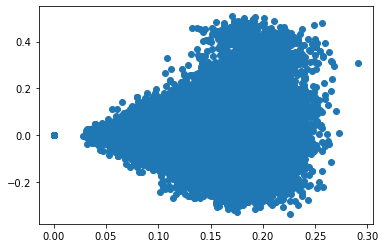

In [103]:
fig = plt.scatter(xs, ys)

In [108]:
km = KMeans(n_clusters=5,
            random_state=20,
            n_init=20)
km.fit(W)

KMeans(n_clusters=5, n_init=20, random_state=20)

In [109]:
num_clusters = 5
X = []
for i in range(num_clusters):
    X.append([])
    
for i in range(50000):
    X[km.labels_[i]].append(W[i].tolist())

In [110]:
color = {
    1: 'red',
    2: 'green',
    3: 'blue',
    4: 'yellow',
    5: 'pink'
}

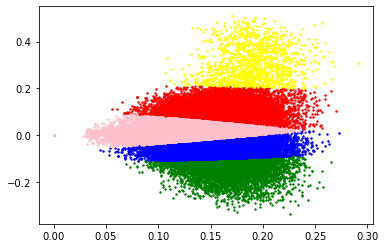

In [111]:
for i in range(num_clusters):
    w = np.array(X[i])
    xs = w[:, 0]
    ys = w[:, 1]
    plt.scatter(xs, ys, c=color[i+1], s=2)
plt.show()